<a href="https://colab.research.google.com/github/Mubashiruddin/Computer-vision/blob/main/Computer_Vision_Face_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Computer Vision - Face recognition

---



## OpenCV

### Loading the dataset

- Yale faces database: http://vision.ucsd.edu/content/yale-face-database

In [ ]:
from PIL import Image #pil PACKAGE is used to read gif images
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import zipfile
path = '/content/drive/MyDrive/Ph/yalefaces.zip'
zip_object = zipfile.ZipFile(file=path, mode = 'r')
zip_object.extractall('./')# all files are extracted in the current directory
zip_object.close()

### Pre-processing the images

In [ ]:
import os
print(os.listdir('/content/yalefaces/train'))

['subject02.sad.gif', 'subject13.noglasses.gif', 'subject06.noglasses.gif', 'subject12.noglasses.gif', 'subject14.rightlight.gif', 'subject09.wink.gif', 'subject06.rightlight.gif', 'subject07.normal.gif', 'subject10.glasses.gif', 'subject13.happy.gif', 'subject12.surprised.gif', 'subject10.normal.gif', 'subject09.centerlight.gif', 'subject02.sleepy.gif', 'subject07.wink.gif', 'subject14.glasses.gif', 'subject11.rightlight.gif', 'subject09.noglasses.gif', 'subject15.happy.gif', 'subject06.centerlight.gif', 'subject04.happy.gif', 'subject09.leftlight.gif', 'subject14.happy.gif', 'subject01.noglasses.gif', 'subject01.leftlight.gif', 'subject01.sad.gif', 'subject05.rightlight.gif', 'subject02.normal.gif', 'subject06.sad.gif', 'subject08.leftlight.gif', 'subject14.surprised.gif', 'subject03.wink.gif', 'subject13.normal.gif', 'subject11.leftlight.gif', 'subject13.centerlight.gif', 'subject10.happy.gif', 'subject10.surprised.gif', 'subject05.normal.gif', 'subject14.centerlight.gif', 'subject1

In [ ]:
def get_image_data():
  paths = [os.path.join('/content/yalefaces/train', f) for f in os.listdir('/content/yalefaces/train')]#here we are reading the images in the yalefaces train directory and joining them with root directory
  #print(paths)
#get_image_data()
  faces = []
  ids = []
  for path in paths:
    #print(path)
    image = Image.open(path).convert('L')# L mode means it is a singlechannel image or grayscale image ; we are converting froma  coloured image to a grayscale image
    #print(type(image)) here it returns the image class as PIL.Image.Image ; however to use open cv , we need to convert it into a numpy array
    image_np = np.array(image, 'uint8')# uint8 means each pixel of the image is an integer value
    #print(type(image_np)) we get class as numpy.ndarray which is what we want
    id = int(os.path.split(path)[1].split('.')[0].replace('subject', '')) # here we are trying to extract only the index(id's) from images , so we first split it when we encounter a white space in the path . [1] indicates we take only second half of the split. the second split splits the string when it sees a dot , then we take only the first position of the splitted string . then we replace the subject with nothing .
    print(id)
# get_image_data()
    ids.append(id)
    faces.append(image_np)

  return np.array(ids), faces

In [ ]:
ids, faces = get_image_data()

2
13
6
12
14
9
6
7
10
13
12
10
9
2
7
14
11
9
15
6
4
9
14
1
1
1
5
2
6
8
14
3
13
11
13
10
10
5
14
10
3
6
5
7
3
10
8
9
5
14
2
5
4
11
15
9
13
9
10
12
4
3
7
3
4
2
4
15
8
1
12
6
15
12
12
12
3
2
3
13
2
8
6
3
1
9
15
13
5
11
8
7
13
13
5
11
11
10
4
15
2
8
7
15
15
4
14
1
6
1
2
7
3
7
4
7
1
8
5
12
14
8
11
10
6
11
5
8
14
12
9
1
11
15
4


In [ ]:
ids

array([ 2, 13,  6, 12, 14,  9,  6,  7, 10, 13, 12, 10,  9,  2,  7, 14, 11,
        9, 15,  6,  4,  9, 14,  1,  1,  1,  5,  2,  6,  8, 14,  3, 13, 11,
       13, 10, 10,  5, 14, 10,  3,  6,  5,  7,  3, 10,  8,  9,  5, 14,  2,
        5,  4, 11, 15,  9, 13,  9, 10, 12,  4,  3,  7,  3,  4,  2,  4, 15,
        8,  1, 12,  6, 15, 12, 12, 12,  3,  2,  3, 13,  2,  8,  6,  3,  1,
        9, 15, 13,  5, 11,  8,  7, 13, 13,  5, 11, 11, 10,  4, 15,  2,  8,
        7, 15, 15,  4, 14,  1,  6,  1,  2,  7,  3,  7,  4,  7,  1,  8,  5,
       12, 14,  8, 11, 10,  6, 11,  5,  8, 14, 12,  9,  1, 11, 15,  4])

In [ ]:
len(ids)

135

In [ ]:
len(faces)

135

array([[109, 111, 124, ..., 255, 255, 241],
       [235, 238, 255, ..., 255, 255, 245],
       [252, 255, 255, ..., 255, 252, 244],
       ...,
       [255, 255, 255, ..., 186, 180, 180],
       [255, 255, 255, ..., 181, 179, 175],
       [ 68,  68,  68, ...,  68,  68,  68]], dtype=uint8)
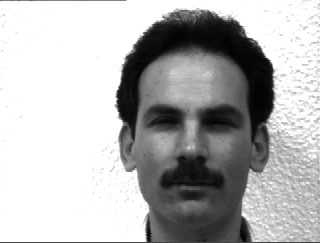

In [ ]:
faces[0]

In [ ]:
faces[0].shape

(243, 320)

In [ ]:
243 * 320

77760

### Training the LBPH classifier

In [ ]:
8 * 8

64

In [ ]:
# threshold: 1.7976931348623157e+308
# radius: 1
# neighbors: 8
# grid_x: 8
# grid_y: 8

lbph_face_classifier = cv2.face.LBPHFaceRecognizer_create(radius = 4, neighbors=14, grid_x = 9, grid_y = 9)
lbph_face_classifier.train(faces, ids)
lbph_face_classifier.write('lbph_classifier.yml') #we are saving the classifier in yml format. it stores histograms for each image

### Recognizing faces (testing)

In [ ]:
# lbph_face_classifier = cv2.face.LBPHFaceRecognizer_create()
lbph_face_classifier.read('/content/lbph_classifier.yml')

In [ ]:
test_image = '/content/yalefaces/test/subject10.sad.gif'

array([[130, 130, 130, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 241, 255, 255],
       [255, 255, 255, ..., 234, 237, 252],
       [ 68,  68,  68, ...,  68,  68,  68]], dtype=uint8)
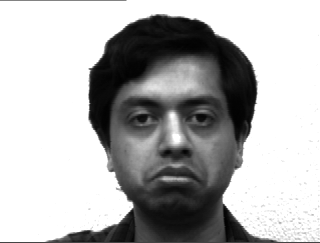

In [ ]:
image = Image.open(test_image).convert('L')
image_np = np.array(image, 'uint8')
image_np

In [ ]:
image_np.shape

(243, 320)

In [ ]:
prediction = lbph_face_classifier.predict(image_np)
prediction

(10, 36.84750735484425)

In [ ]:
prediction[0]

10

In [ ]:
expected_output = int(os.path.split(test_image)[1].split('.')[0].replace('subject', ''))
expected_output

10

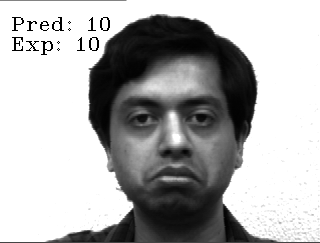

In [ ]:
cv2.putText(image_np, 'Pred: ' + str(prediction[0]), (10, 30), cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, (0,255,0))
cv2.putText(image_np, 'Exp: ' + str(expected_output), (10, 50), cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, (0,255,0))
cv2_imshow(image_np)

### Evaluating the face classifier

In [ ]:
paths = [os.path.join('/content/yalefaces/test', f) for f in os.listdir('/content/yalefaces/test')]
predictions = []
expected_outputs = []
for path in paths:
  #print(path)
  image = Image.open(path).convert('L')
  image_np = np.array(image, 'uint8')
  prediction, _ = lbph_face_classifier.predict(image_np) # _ is used to ignore the second parameter of confidence obtainained
  expected_output = int(os.path.split(path)[1].split('.')[0].replace('subject', ''))

  predictions.append(prediction)
  expected_outputs.append(expected_output)

In [ ]:
type(predictions)

list

In [ ]:
predictions = np.array(predictions)
expected_outputs = np.array(expected_outputs)

In [ ]:
type(predictions)

numpy.ndarray

In [ ]:
predictions

array([ 3,  4, 14, 12, 10,  1,  4,  3,  9,  5,  7, 14, 15, 12, 11, 14,  7,
        4,  6,  4,  4,  7,  9, 13, 11,  4, 12, 13,  8,  5])

In [ ]:
expected_outputs

array([ 3,  4, 14, 12, 10,  1,  2,  3,  7,  5,  9,  6, 15, 12, 11, 14, 15,
        1,  6,  4,  8,  7,  9, 13, 11, 10,  2, 13,  8,  5])

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(expected_outputs, predictions)

0.7

In [ ]:
len(predictions)

30

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(expected_outputs, predictions)
cm

array([[1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1]])

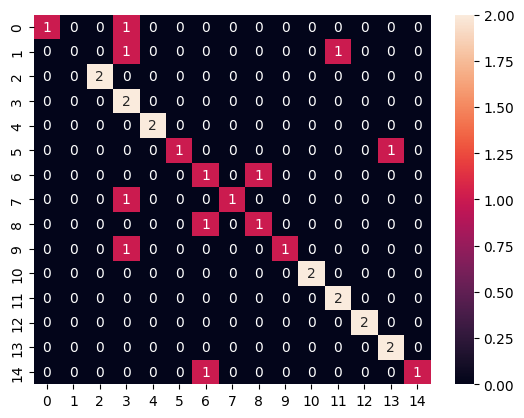

In [ ]:
import seaborn
seaborn.heatmap(cm, annot=True);

## face recognition using Dlib library

In [ ]:
import dlib
import cv2
from google.colab.patches import cv2_imshow

### Detecting facial points

In [ ]:
face_detector = dlib.get_frontal_face_detector()
points_detector = dlib.shape_predictor('/content/drive/MyDrive/Ph/Weights/shape_predictor_68_face_landmarks.dat') #this algo uses 68 points to classify a bounding box for a face

In [ ]:
image = cv2.imread('/content/drive/MyDrive/Ph/people2.png')

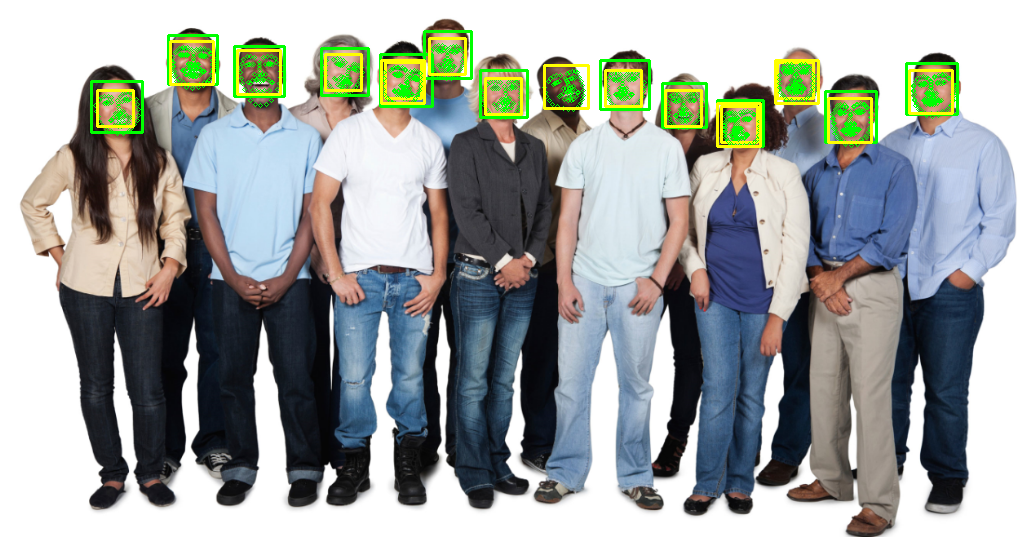

In [ ]:
face_detection = face_detector(image, 1) # 1 represents the scale of the image
for face in face_detection:
  points = points_detector(image, face)
  for point in points.parts():
    cv2.circle(image, (point.x, point.y), 2, (0,255,0), 1) #cv2.circle(img, center, radius, color, thickness)


  #print(points.parts())
  #print(len(points.parts()))

  l, t, r, b = face.left(), face.top(), face.right(), face.bottom()
  cv2.rectangle(image, (l, t), (r, b), (0,255,255), 2)
cv2_imshow(image)

### Detecting facial descriptors

In [ ]:
import os

In [ ]:
# Resnet: https://arxiv.org/abs/1512.03385
face_detector = dlib.get_frontal_face_detector()
points_detector = dlib.shape_predictor('/content/drive/MyDrive/Ph/Weights/shape_predictor_68_face_landmarks.dat')
face_descriptor_extractor = dlib.face_recognition_model_v1('/content/drive/MyDrive/Ph/Weights/dlib_face_recognition_resnet_model_v1.dat') # face descriptor extractor uses gpu
#dlib uses cnn architecture to detect faces


In [ ]:
index = {}
idx = 0
face_descriptors = None

paths = [os.path.join('/content/yalefaces/train', f) for f in os.listdir('/content/yalefaces/train')]
for path in paths:
  # print(path)
  image = Image.open(path).convert('RGB')# dlib accepts rgb image
  image_np = np.array(image, 'uint8')# uint8 means pictures are represented by integer values
  face_detection = face_detector(image_np, 1)

  for face in face_detection:
    l, t, r, b = face.left(), face.top(), face.right(), face.bottom()
    cv2.rectangle(image_np, (l, t), (r, b), (0, 0, 255), 2)# 2 is border size

    points = points_detector(image_np, face)# face is the part inside bounding box
    for point in points.parts():
      cv2.circle(image_np, (point.x, point.y), 2, (0, 255, 0), 1)
    # cv2_imshow(image_np)
    face_descriptor = face_descriptor_extractor.compute_face_descriptor(image_np, points)#we send the 68 points to the neural network and it in turn gives 128 values for each of the faces
    # print(type(face_descriptor))
    # print(len(face_descriptor))
    # print(face_descriptor)
    face_descriptor = [f for f in face_descriptor]#putting alll face_desciptror values in a list format
    # print(face_descriptor)
    face_descriptor = np.asarray(face_descriptor, dtype=np.float64)#converting list to np array
    # print(face_descriptor)
    # print(face_descriptor.shape) #here we get (128,0) i.e a vector of length 128 or a matrix of dimensions 128,0 i.e a 1-d matrix
    face_descriptor = face_descriptor[np.newaxis, :]# we are addding a new dimension to the matrix to make it (1,128) : means we consider all 128 values of the matrix
    # print(face_descriptor.shape)
    # print(face_descriptor)

    if face_descriptors is None:
      face_descriptors = face_descriptor
    else:
      face_descriptors = np.concatenate((face_descriptors, face_descriptor), axis = 0) #axis =0 means we will add 1 row for each face

    index[idx] = path
    idx += 1
    '''Suppose idx = 0 and the current path is /content/yalefaces/train/person1.jpg.
Then, index[0] = '/content/yalefaces/train/person1.jpg'.

Why it's useful:
After processing all images, you can use the index dictionary to trace back from a face descriptor (stored in face_descriptors) to the image where that face originated. This is helpful for tasks like identifying which face belongs to which image.

In Context of the Code:
These two lines maintain a reference between the processed face descriptors (stored in face_descriptors) and their source images (index). This is crucial for organizing and using face recognition data effectively.
'''


In [ ]:
face_descriptors.shape #o/p 132,128 means that we have 132 images and each image has 128 values

(132, 128)

In [ ]:
face_descriptors

array([[-0.14021032,  0.0755212 ,  0.01510923, ...,  0.01090847,
         0.06845599,  0.02865314],
       [-0.1675843 ,  0.15840213,  0.04897258, ..., -0.00262208,
         0.12081444,  0.07992421],
       [-0.11867017,  0.12698895,  0.0297598 , ...,  0.00575538,
         0.08159252, -0.02748523],
       ...,
       [-0.0812939 ,  0.08415063, -0.05214189, ...,  0.01558135,
         0.05383632,  0.04132674],
       [-0.17524132,  0.07486124,  0.00206971, ...,  0.01953064,
         0.13625431,  0.05821815],
       [-0.17317143,  0.09850319,  0.05565149, ..., -0.00197637,
         0.13108057, -0.05130087]])

In [ ]:
len(index)

132

In [ ]:
index

{0: '/content/yalefaces/train/subject02.sad.gif',
 1: '/content/yalefaces/train/subject13.noglasses.gif',
 2: '/content/yalefaces/train/subject06.noglasses.gif',
 3: '/content/yalefaces/train/subject12.noglasses.gif',
 4: '/content/yalefaces/train/subject14.rightlight.gif',
 5: '/content/yalefaces/train/subject09.wink.gif',
 6: '/content/yalefaces/train/subject06.rightlight.gif',
 7: '/content/yalefaces/train/subject07.normal.gif',
 8: '/content/yalefaces/train/subject10.glasses.gif',
 9: '/content/yalefaces/train/subject13.happy.gif',
 10: '/content/yalefaces/train/subject12.surprised.gif',
 11: '/content/yalefaces/train/subject10.normal.gif',
 12: '/content/yalefaces/train/subject09.centerlight.gif',
 13: '/content/yalefaces/train/subject02.sleepy.gif',
 14: '/content/yalefaces/train/subject07.wink.gif',
 15: '/content/yalefaces/train/subject14.glasses.gif',
 16: '/content/yalefaces/train/subject09.noglasses.gif',
 17: '/content/yalefaces/train/subject15.happy.gif',
 18: '/content/ya

### Calculating the distance between faces

In [ ]:
face_descriptors[131]

array([-0.17317142,  0.09850316,  0.05565149, -0.05539175, -0.02879368,
       -0.05965046, -0.03995393, -0.1205795 ,  0.17951395, -0.10741367,
        0.27764791, -0.03938848, -0.17637134, -0.15631707, -0.02652284,
        0.19985315, -0.22547209, -0.12447178, -0.00685543,  0.00623288,
        0.12772107,  0.02508534,  0.0292584 ,  0.01277171, -0.14672461,
       -0.33570987, -0.11110422, -0.12610075,  0.00267787, -0.03639387,
       -0.05409677, -0.0691645 , -0.21351577, -0.0977193 ,  0.02578954,
        0.03174268, -0.03273258, -0.08004867,  0.18143469,  0.00674607,
       -0.20764434,  0.01678376,  0.06446838,  0.231958  ,  0.18343355,
        0.03515408,  0.02022972, -0.17999655,  0.13814643, -0.11280209,
       -0.00797377,  0.10111537,  0.08912264,  0.0417302 ,  0.03008556,
       -0.11800317,  0.00203966,  0.10468487, -0.13025069, -0.02265403,
        0.07056812, -0.04119729, -0.05078266, -0.08433526,  0.24512665,
        0.02995062, -0.14742534, -0.16225813,  0.12093908, -0.06

In [ ]:
# https://numpy.org/doc/stable/reference/generated/numpy.linalg.norm.html#numpy.linalg.norm
#distance between the images shows how similar the images are
np.linalg.norm(face_descriptors[131] - face_descriptors[131])

0.0

In [ ]:
np.linalg.norm(face_descriptors[131] - face_descriptors[130])

0.7570376958513124

In [ ]:
np.linalg.norm(face_descriptors[131] - face_descriptors[129])

0.7967781591221014

In [ ]:
np.linalg.norm(face_descriptors[131] - face_descriptors[128])

0.8652940047263683

In [ ]:
np.linalg.norm(face_descriptors[0] - face_descriptors, axis = 1)# axis=1 means columns ; we want to compare facial descriptors of image[0] with the rest of the descriptors

array([0.        , 0.58799715, 0.71629693, 0.61843091, 0.8158723 ,
       0.6264275 , 0.74997013, 0.6331109 , 0.76092482, 0.60596947,
       0.63455096, 0.73722731, 0.63362965, 0.2943864 , 0.5853066 ,
       0.79918124, 0.58404879, 0.69089374, 0.7607434 , 0.7538057 ,
       0.62670125, 0.74549677, 0.67401296, 0.67750817, 0.65901641,
       0.23496556, 0.67888265, 0.79186675, 0.76427965, 0.71148693,
       0.58837333, 0.73963957, 0.66015421, 0.75757726, 0.73010336,
       0.65363735, 0.83149222, 0.70820036, 0.70616182, 0.7168625 ,
       0.6047367 , 0.74598927, 0.74235602, 0.74686258, 0.83295799,
       0.54460274, 0.61547157, 0.82346802, 0.36707525, 0.59829128,
       0.80142179, 0.68468724, 0.72268432, 0.58404879, 0.53690085,
       0.60919266, 0.73773315, 0.61280958, 0.77605613, 0.73761029,
       0.6331109 , 0.81371336, 0.8117449 , 0.29350233, 0.80732845,
       0.67895922, 0.73070265, 0.66675942, 0.69403743, 0.68696525,
       0.60542145, 0.6463359 , 0.59906657, 0.69622988, 0.28672

In [ ]:
np.argmin(np.linalg.norm(face_descriptors[0] - face_descriptors[1:], axis = 1)) # returnss index of the image most simiilar to img[0] also, [1:0] means start from the index 1 instead of 0

24

In [ ]:
np.linalg.norm(face_descriptors[0] - face_descriptors[1:], axis = 1)[24]

0.23496556020077425

### Detecting faces with Dlib

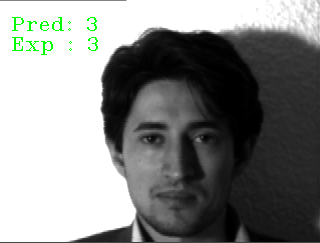

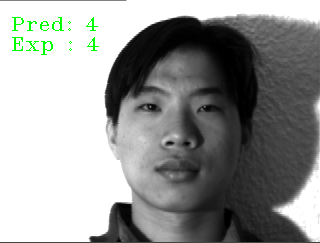

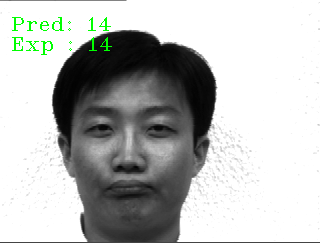

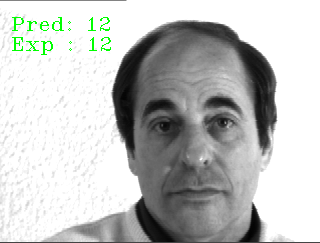

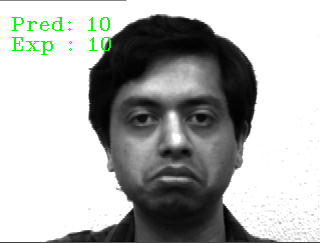

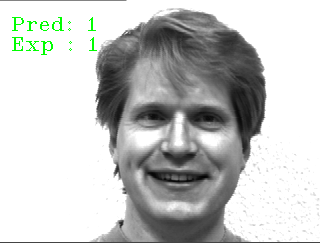

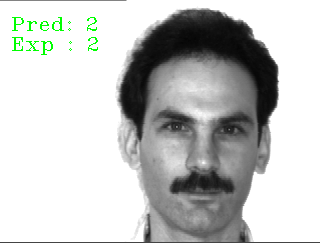

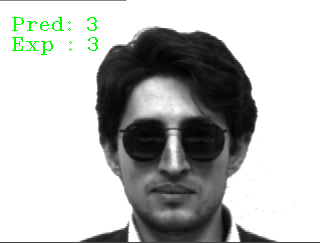

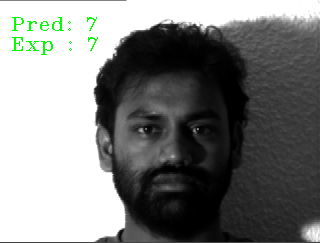

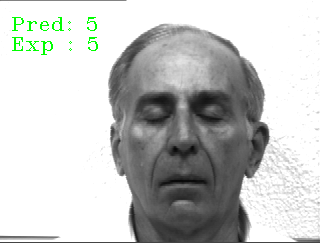

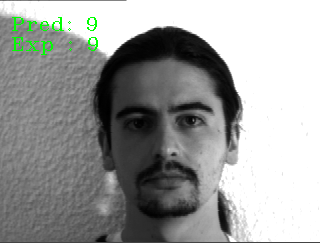

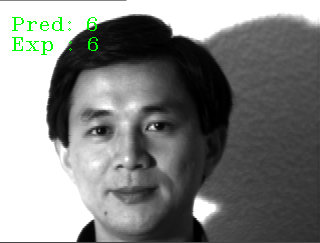

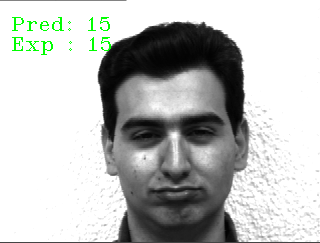

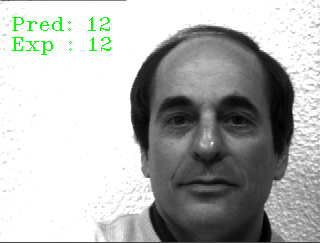

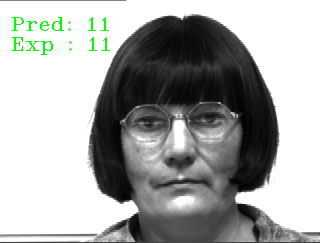

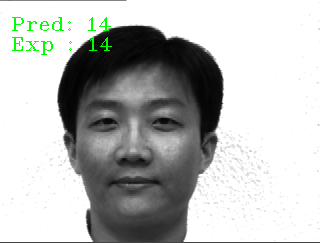

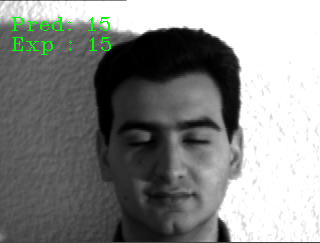

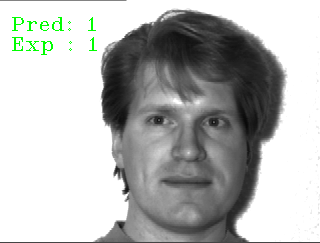

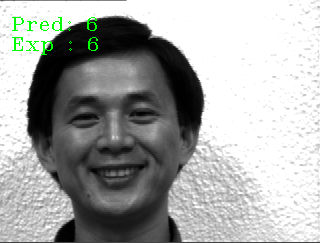

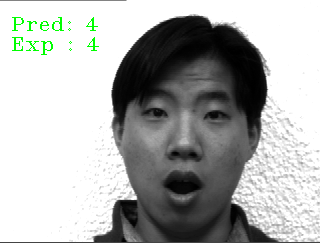

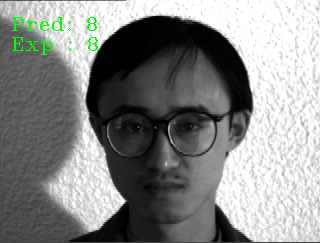

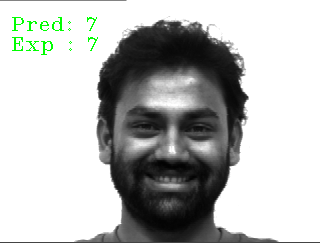

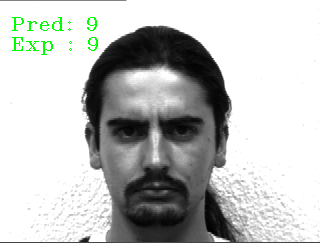

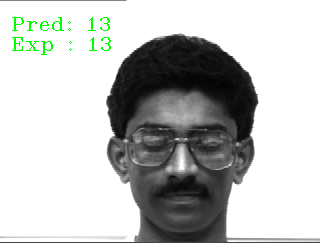

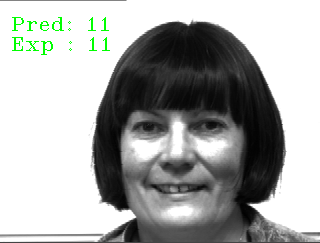

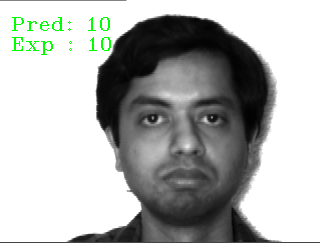

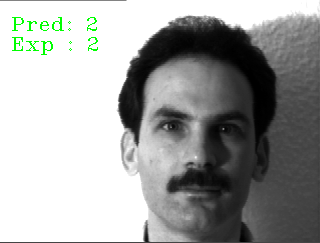

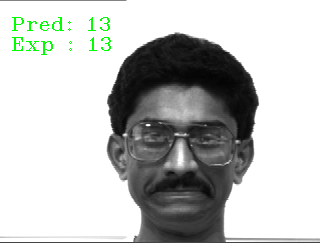

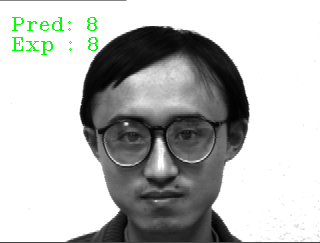

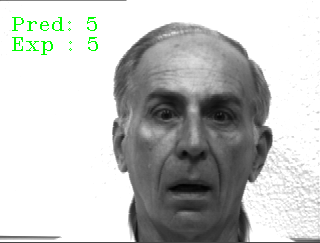

In [ ]:
threshold = 0.5
predictions = []
expected_outputs = []

paths = [os.path.join('/content/yalefaces/test', f) for f in os.listdir('/content/yalefaces/test')]
for path in paths:
  image = Image.open(path).convert('RGB')
  image_np = np.array(image, 'uint8')
  face_detection = face_detector(image_np, 1)
  for face in face_detection:
    points = points_detector(image_np, face)
    face_descriptor = face_descriptor_extractor.compute_face_descriptor(image_np, points)
    face_descriptor = [f for f in face_descriptor]
    face_descriptor = np.asarray(face_descriptor, dtype=np.float64)
    face_descriptor = face_descriptor[np.newaxis, :]

    distances = np.linalg.norm(face_descriptor - face_descriptors, axis = 1)#face descriptors are training images and face descriptor is test image
    min_index = np.argmin(distances)
    min_distance = distances[min_index]
    if min_distance <= threshold:
      name_pred = int(os.path.split(index[min_index])[1].split('.')[0].replace('subject', ''))
    else:
      name_pred = 'Not identified'

    name_real = int(os.path.split(path)[1].split('.')[0].replace('subject', ''))

    predictions.append(name_pred)
    expected_outputs.append(name_real)

    cv2.putText(image_np, 'Pred: ' + str(name_pred), (10, 30), cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, (0,255,0))
    cv2.putText(image_np, 'Exp : ' + str(name_real), (10, 50), cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, (0,255,0))


  cv2_imshow(image_np)

predictions = np.array(predictions)
expected_outputs = np.array(expected_outputs)

In [ ]:
predictions

array([ 3,  4, 14, 12, 10,  1,  4,  3,  9,  5,  7, 14, 15, 12, 11, 14,  7,
        4,  6,  4,  4,  7,  9, 13, 11,  4, 12, 13,  8,  5])

In [ ]:
expected_outputs

array([ 3,  4, 14, 12, 10,  1,  2,  3,  7,  5,  9,  6, 15, 12, 11, 14, 15,
        1,  6,  4,  8,  7,  9, 13, 11, 10,  2, 13,  8,  5])

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(expected_outputs, predictions)

1.0

## Homework

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import zipfile
path = '/content/drive/MyDrive/Ph/yalefaces.zip'
zip_object = zipfile.ZipFile(file=path, mode='r')
zip_object.extractall('./')
zip_object.close()

In [ ]:
def get_image_data():
  paths = [os.path.join('/content/jones_gabriel', f) for f in os.listdir('/content/jones_gabriel')]
  faces = []
  ids = []
  for path in paths:
    image = Image.open(path).convert('L')
    image_np = np.array(image, 'uint8')
    id = int(path.split('.')[1])

    ids.append(id)
    faces.append(image_np)

  return np.array(ids), faces

In [ ]:
ids, faces = get_image_data()

In [ ]:
lbph_classifier = cv2.face.LBPHFaceRecognizer_create()
lbph_classifier.train(faces, ids)
lbph_classifier.write('lbph_classifier.yml')

In [ ]:
lbph_face_classifier = cv2.face.LBPHFaceRecognizer_create()
lbph_face_classifier.read('/content/lbph_classifier.yml')

In [ ]:
image = Image.open('/content/jones_gabriel/person.1.1.jpg')
image.size

(220, 220)

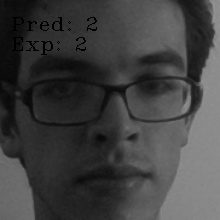

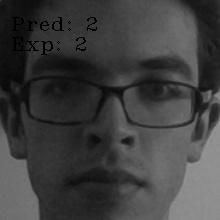

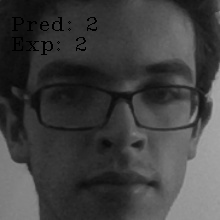

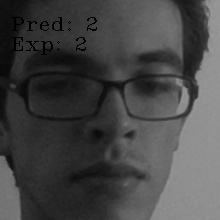

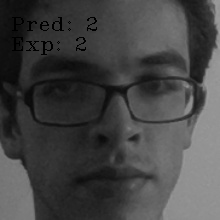

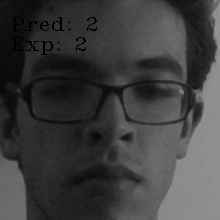

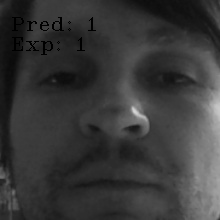

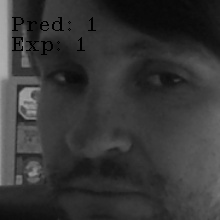

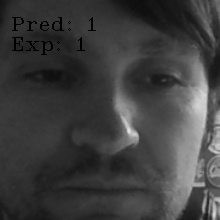

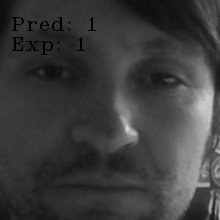

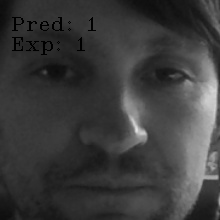

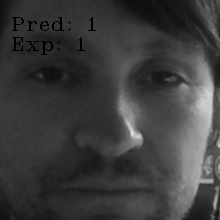

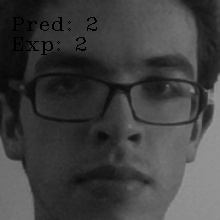

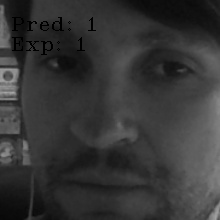

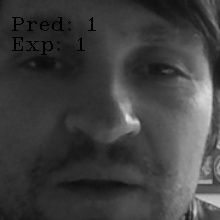

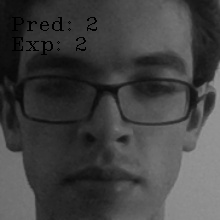

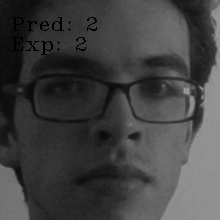

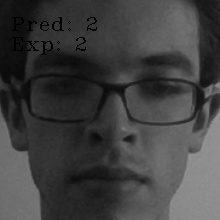

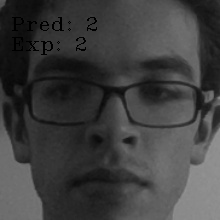

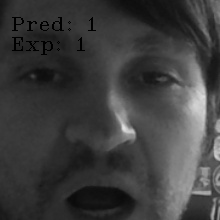

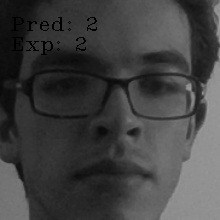

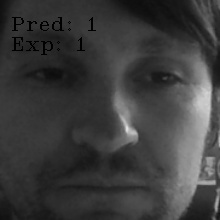

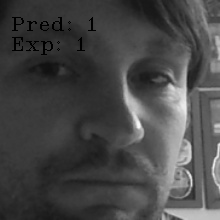

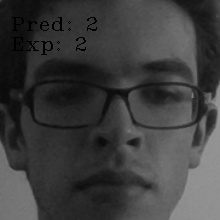

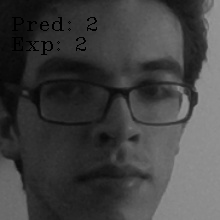

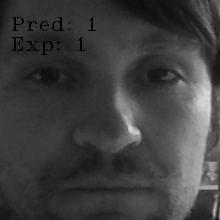

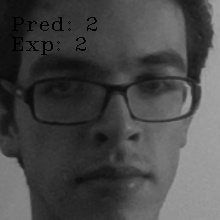

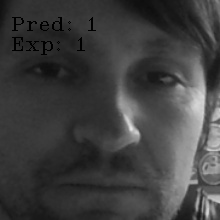

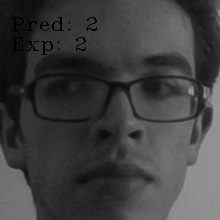

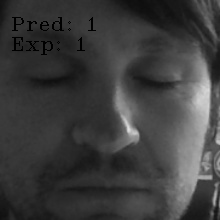

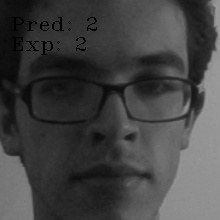

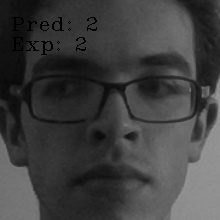

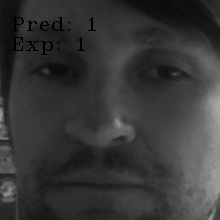

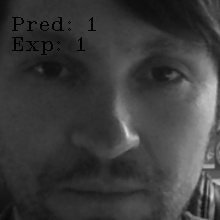

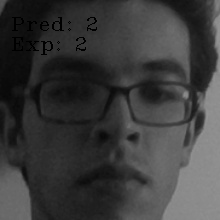

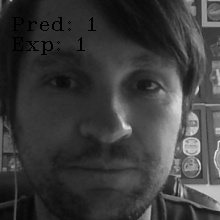

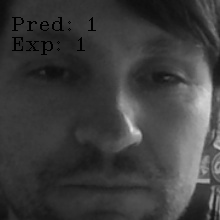

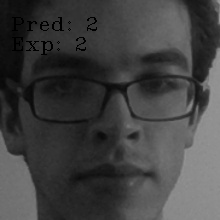

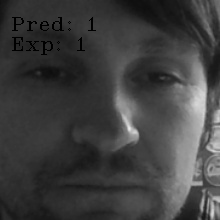

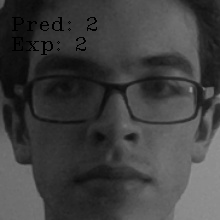

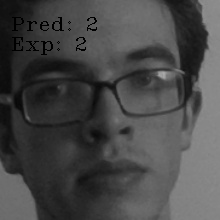

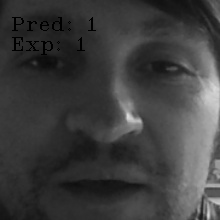

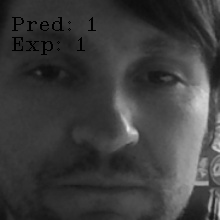

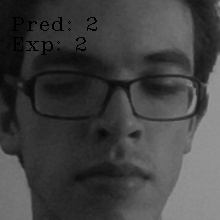

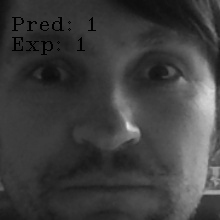

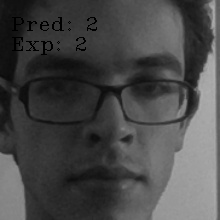

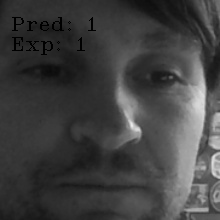

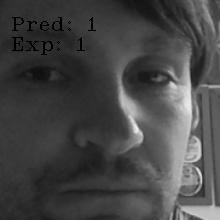

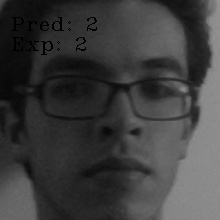

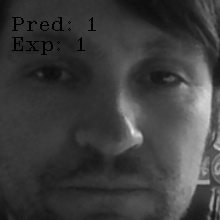

In [ ]:
paths = [os.path.join('/content/jones_gabriel', f) for f in os.listdir('/content/jones_gabriel')]
for path in paths:
  image = Image.open(path).convert('L')
  image_np = np.array(image, 'uint8')
  prediction, _ = lbph_face_classifier.predict(image_np)
  expected_output = int(path.split('.')[1])

  cv2.putText(image_np, 'Pred: ' + str(prediction), (10,30), cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, (0,255,0))
  cv2.putText(image_np, 'Exp: ' + str(expected_output), (10,50), cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, (0,255,0))
  cv2_imshow(image_np)